# Sampling and Fitting the Hill Function Model


In [24]:
from scripts.N2_optimizing_a_design import *

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       36

Total number of variables............................:        8
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        8
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

### Sampling the Model using Simulated Data



In [25]:
data = hill_model.sample(exact_design,nominal_param)

Sampling Datasets: |██████████████████████████████████████████████████| 100.0%


In [26]:
print(data)

     Inducer  Variable  Observation
0   1.818286  Response     3.314058
1   1.818286  Response     3.350793
2   1.818286  Response     3.665409
3   1.818286  Response     3.420714
4   1.818286  Response     3.595638
5   1.818286  Response     3.740483
6   5.000000  Response     4.466785
7   5.000000  Response     4.213058
8   5.000000  Response     4.502332
9   5.000000  Response     4.347829
10  5.000000  Response     4.668220
11  5.000000  Response     4.917489
12  0.420383  Response     1.884923
13  0.420383  Response     1.764674
14  0.420383  Response     1.872463
15  0.420383  Response     1.874378
16  0.420383  Response     1.927788
17  0.420383  Response     2.033790
18  0.100000  Response     1.189429
19  0.100000  Response     1.253863
20  0.100000  Response     1.400522
21  0.100000  Response     1.278223
22  0.100000  Response     1.173978
23  0.100000  Response     1.352382


### Fitting the Model with Maximum Likelihood

In [34]:
fit_options={'Confidence':'Profiles',  
             'InitParamBounds':[(-1,4),(-1,4),(-1,4),(-1,4)],
             'InitSearchNumber':7,
             'SearchBound':5.}


Fitting Dataset(s): |██████████████████████████████████████████████████| 100.0%
Computing confidence information for replicat: 0
Profile Traces: |██████████████████████████████████████████████████| 100.0%


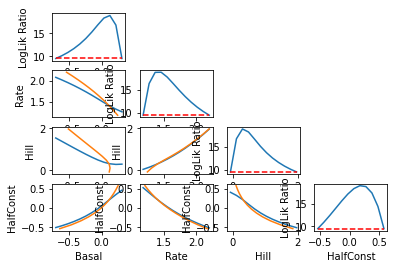

Parameter     Basal      Rate      Hill  HalfConst
0          0.110983  1.412058  0.320565    0.20549


In [35]:
fit_info = hill_model.fit(data, options=fit_options)
print(fit_info['Estimate'])

In [33]:
print(fit_info['Lower'])
print(fit_info['Upper'])

Parameter     Basal      Rate      Hill  HalfConst
0         -0.693128  1.183252 -0.074704  -0.536521
Parameter     Basal      Rate     Hill  HalfConst
0          0.307622  2.196458  1.96355   0.579308


In [29]:
fit_params = fit_info['Estimate'].to_numpy().flatten()
print(np.exp(fit_params))

[1.11737571 4.10439541 1.37790608 1.22812728]


In [30]:
print(np.exp(nominal_param))

[1. 5. 2. 1.]
